 ## **Linear Regression**

### **Importing The Data Set**

In [122]:
import pandas as pd
file_path = 'preprocessed_students-performance_data.csv'
data = pd.read_csv(file_path)

In [123]:
display(data.head())

,num__Math_Score,num__Reading_Score,num__Writing_Score,num__Total_Score,num__Average_Score,nom__Ethnicity_group B,nom__Ethnicity_group C,nom__Ethnicity_group D,nom__Ethnicity_group E,nom__Lunch_standard,nom__Test_Prep_none,nom__Gender_male,ord__Parental_LOE_high school,ord__Parental_LOE_some college,ord__Parental_LOE_associate's degree,ord__Parental_LOE_bachelor's degree,ord__Parental_LOE_master's degree
0,72.0,72.0,74.0,218.0,72.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,69.0,90.0,88.0,247.0,82.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,90.0,95.0,93.0,278.0,92.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,57.0,44.0,148.0,49.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.0,78.0,75.0,229.0,76.333333,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### **Cleaning The Data (Keeping only the Independent and Dependent Variables)**

In [124]:
Cleaned_data = data.drop(columns=["num__Total_Score", "num__Average_Score"], errors="ignore")
display(data.head())

,num__Math_Score,num__Reading_Score,num__Writing_Score,num__Total_Score,num__Average_Score,nom__Ethnicity_group B,nom__Ethnicity_group C,nom__Ethnicity_group D,nom__Ethnicity_group E,nom__Lunch_standard,nom__Test_Prep_none,nom__Gender_male,ord__Parental_LOE_high school,ord__Parental_LOE_some college,ord__Parental_LOE_associate's degree,ord__Parental_LOE_bachelor's degree,ord__Parental_LOE_master's degree
0,72.0,72.0,74.0,218.0,72.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,69.0,90.0,88.0,247.0,82.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,90.0,95.0,93.0,278.0,92.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,57.0,44.0,148.0,49.333333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.0,78.0,75.0,229.0,76.333333,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


### **Getting The Inputs and Outputs**

#### **Independent Variable**

In [125]:
X = Cleaned_data.iloc[:, 1:].values
X

array([[72., 74.,  1., ...,  0.,  1.,  0.],
       [90., 88.,  0., ...,  0.,  0.,  0.],
       [95., 93.,  1., ...,  0.,  0.,  1.],
       ...,
       [71., 65.,  0., ...,  0.,  0.,  0.],
       [78., 77.,  0., ...,  0.,  0.,  0.],
       [86., 86.,  0., ...,  0.,  0.,  0.]], shape=(1000, 14))

#### **Dependent Variable**

In [126]:
y = Cleaned_data.iloc[:,0].values
y

array([ 72.,  69.,  90.,  47.,  76.,  71.,  88.,  40.,  64.,  38.,  58.,
        40.,  65.,  78.,  50.,  69.,  88.,  18.,  46.,  54.,  66.,  65.,
        44.,  69.,  74.,  73.,  69.,  67.,  70.,  62.,  69.,  63.,  56.,
        40.,  97.,  81.,  74.,  50.,  75.,  57.,  55.,  58.,  53.,  59.,
        50.,  65.,  55.,  66.,  57.,  82.,  53.,  77.,  53.,  88.,  71.,
        33.,  82.,  52.,  58.,   0.,  79.,  39.,  62.,  69.,  59.,  67.,
        45.,  60.,  61.,  39.,  58.,  63.,  41.,  61.,  49.,  44.,  30.,
        80.,  61.,  62.,  47.,  49.,  50.,  72.,  42.,  73.,  76.,  71.,
        58.,  73.,  65.,  27.,  71.,  43.,  79.,  78.,  65.,  63.,  58.,
        65.,  79.,  68.,  85.,  60.,  98.,  58.,  87.,  66.,  52.,  70.,
        77.,  62.,  54.,  51.,  99.,  84.,  75.,  78.,  51.,  55.,  79.,
        91.,  88.,  63.,  83.,  87.,  72.,  65.,  82.,  51.,  89.,  53.,
        87.,  75.,  74.,  58.,  51.,  70.,  59.,  71.,  76.,  59.,  42.,
        57.,  88.,  22.,  88.,  73.,  68., 100.,  6

### **Creating the Training Set and the Test Set**

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=0)

In [128]:
X_train

array([[78., 73.,  0., ...,  1.,  0.,  0.],
       [79., 82.,  0., ...,  0.,  0.,  1.],
       [56., 53.,  0., ...,  1.,  0.,  0.],
       ...,
       [51., 55.,  0., ...,  0.,  0.,  0.],
       [66., 62.,  0., ...,  0.,  0.,  0.],
       [66., 68.,  1., ...,  0.,  0.,  0.]], shape=(800, 14))

In [129]:
X_test

array([[72., 74.,  0., ...,  0.,  1.,  0.],
       [73., 72.,  0., ...,  1.,  0.,  0.],
       [46., 50.,  0., ...,  0.,  0.,  0.],
       ...,
       [83., 75.,  1., ...,  0.,  0.,  0.],
       [70., 74.,  0., ...,  1.,  0.,  0.],
       [67., 69.,  0., ...,  0.,  0.,  0.]], shape=(200, 14))

In [130]:
y_train

array([ 77.,  74.,  62.,  91.,  61.,  35.,  72.,  74.,  66.,  72.,  51.,
        94.,  50.,  59.,  32.,  55.,  61.,  62.,  55.,  65.,  75.,  68.,
        72.,  63.,  65.,  78.,  84.,  69.,  46.,  62.,  36.,  53.,  58.,
        42.,  62.,  62.,  67.,  77.,  71.,  46.,  66.,  49.,  67.,  59.,
        65.,  71.,  63.,  90.,  55.,  79.,  80.,  77.,  73.,  75.,  44.,
        72.,  43.,  84.,  69.,  75.,  58.,  81.,  75.,  76.,  60.,  76.,
        72.,  63.,  69.,  71.,  80.,  61.,  53.,  49.,  74.,  75.,  61.,
        53.,  73.,  79.,  84.,  71.,  63.,  65.,  58.,  57.,  87.,  80.,
        66.,  55.,  74.,  80.,  69.,  56.,  79.,  58.,  68.,  74.,  64.,
        58.,  58.,  61.,  76.,  60.,  73.,  70.,  65.,  51.,  74.,  45.,
        85.,  74.,  56.,  66.,  88.,  80.,  82.,  81.,  63.,  82.,  97.,
        68.,  48.,  75.,  65.,  30.,  57.,  95.,  99.,  90.,  71.,  50.,
        59.,  69.,  53.,  67.,  83.,  51.,  87.,  79.,  74.,  80.,  51.,
        65.,  60.,  49.,  65.,  55.,  80.,  85.,  8

In [131]:
y_test

array([ 62.,  87.,  40.,  77.,  69.,  78.,  67.,  46.,  99.,  46.,  54.,
        53.,  91.,  84.,  48.,  33.,  57.,  81.,  50.,  80.,  63.,  52.,
        73.,  66.,  55.,  68.,  65.,  60.,  53.,  69.,  71.,  93.,  82.,
        48.,  52.,  92.,  92.,  69.,  57.,  69.,  76.,  62.,  71.,  57.,
        71.,  52.,  77.,  59.,  77.,  44.,  47.,  67.,  44.,  61.,  39.,
        63.,  47.,  69.,  81.,  56.,  68.,  74.,  42.,  69.,  63.,  59.,
        76.,  47.,  60.,  61.,  81.,  90.,  80.,  58.,  64.,  71.,  73.,
        70.,  29.,  73.,  79.,  79.,  64.,  79.,  70.,  77.,  63.,  94.,
        59.,  43.,  65.,  54.,  54.,  73.,  86.,  70.,  63.,  52.,  61.,
        70.,  32.,  90.,  67.,  34.,  83.,  67.,  63.,  52.,  45.,  87.,
        63.,  73.,  26.,  54.,  62.,  67.,  78.,  79.,  79.,  54.,  46.,
        67.,  88.,  82.,  79.,  40.,  74.,  70.,  77.,  61.,  68.,  67.,
        30.,  81.,  77.,  61.,  67.,  64.,  62.,  81.,  68.,  60.,  71.,
        68.,  65.,  41.,  38.,  48.,  71.,  97.,  5

### **Scaling the model**

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part 2 - Building and training the model

#### **Building the model**

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

####  **Training the Model**

In [134]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Inference

In [135]:
y_pred = model.predict(X_test_scaled)

#### Making the prediction of a single data point with the third row of the cleaned data as the numerical values

In [136]:
display(Cleaned_data.head())

,num__Math_Score,num__Reading_Score,num__Writing_Score,nom__Ethnicity_group B,nom__Ethnicity_group C,nom__Ethnicity_group D,nom__Ethnicity_group E,nom__Lunch_standard,nom__Test_Prep_none,nom__Gender_male,ord__Parental_LOE_high school,ord__Parental_LOE_some college,ord__Parental_LOE_associate's degree,ord__Parental_LOE_bachelor's degree,ord__Parental_LOE_master's degree
0,72.0,72.0,74.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,69.0,90.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,90.0,95.0,93.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,57.0,44.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.0,78.0,75.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [137]:
sample = pd.DataFrame([[95.0, 93.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]],
                      columns=Cleaned_data.columns[1:])

sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
prediction

c:\Users\ASUS\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([84.66522022])

## **Part 3: Evaluating the Model**

### Mean Absolute Error

In [138]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 4.39484274852452


### Mean Squared Error

In [139]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 31.046790272758408


### R-Squared

In [140]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8629895363812152

### Adjusted R-Squared

In [141]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8526211769722261

## **Visualizations**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cleaned_data = pd.read_csv("preprocessed_students-performance_data.csv")

independent_vars = [
    "num__Reading_Score",
    "num__Writing_Score",
    "nom__Ethnicity_group B",
    "nom__Ethnicity_group C",
    "nom__Ethnicity_group D",
    "nom__Ethnicity_group E",
    "nom__Lunch_standard",
    "nom__Test_Prep_none",
    "nom__Gender_male",
    "ord__Parental_LOE_high school",
    "ord__Parental_LOE_some college",
    "ord__Parental_LOE_associate's degree",
    "ord__Parental_LOE_bachelor's degree",
    "ord__Parental_LOE_master's degree"
]

X = Cleaned_data[independent_vars]
y = Cleaned_data["num__Math_Score"]

#### **Scatter Plot**

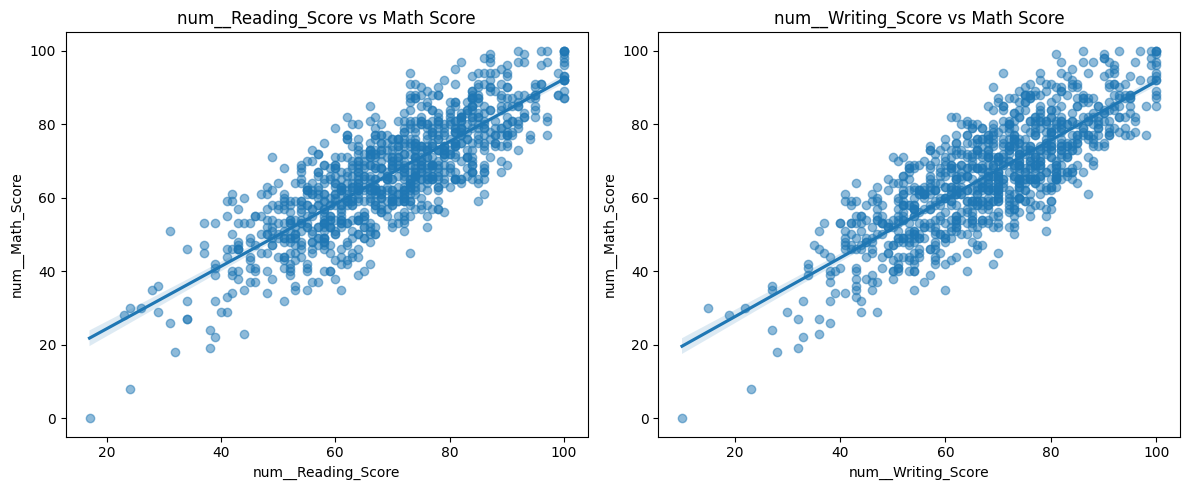

In [143]:
numeric_vars = ["num__Reading_Score", "num__Writing_Score"]

plt.figure(figsize=(12,5))
for i, var in enumerate(numeric_vars):
    plt.subplot(1, len(numeric_vars), i+1)
    sns.regplot(x=var, y="num__Math_Score", data=Cleaned_data, scatter_kws={'alpha':0.5})
    plt.title(f"{var} vs Math Score")
plt.tight_layout()
plt.show()

#### **Bar Plot**

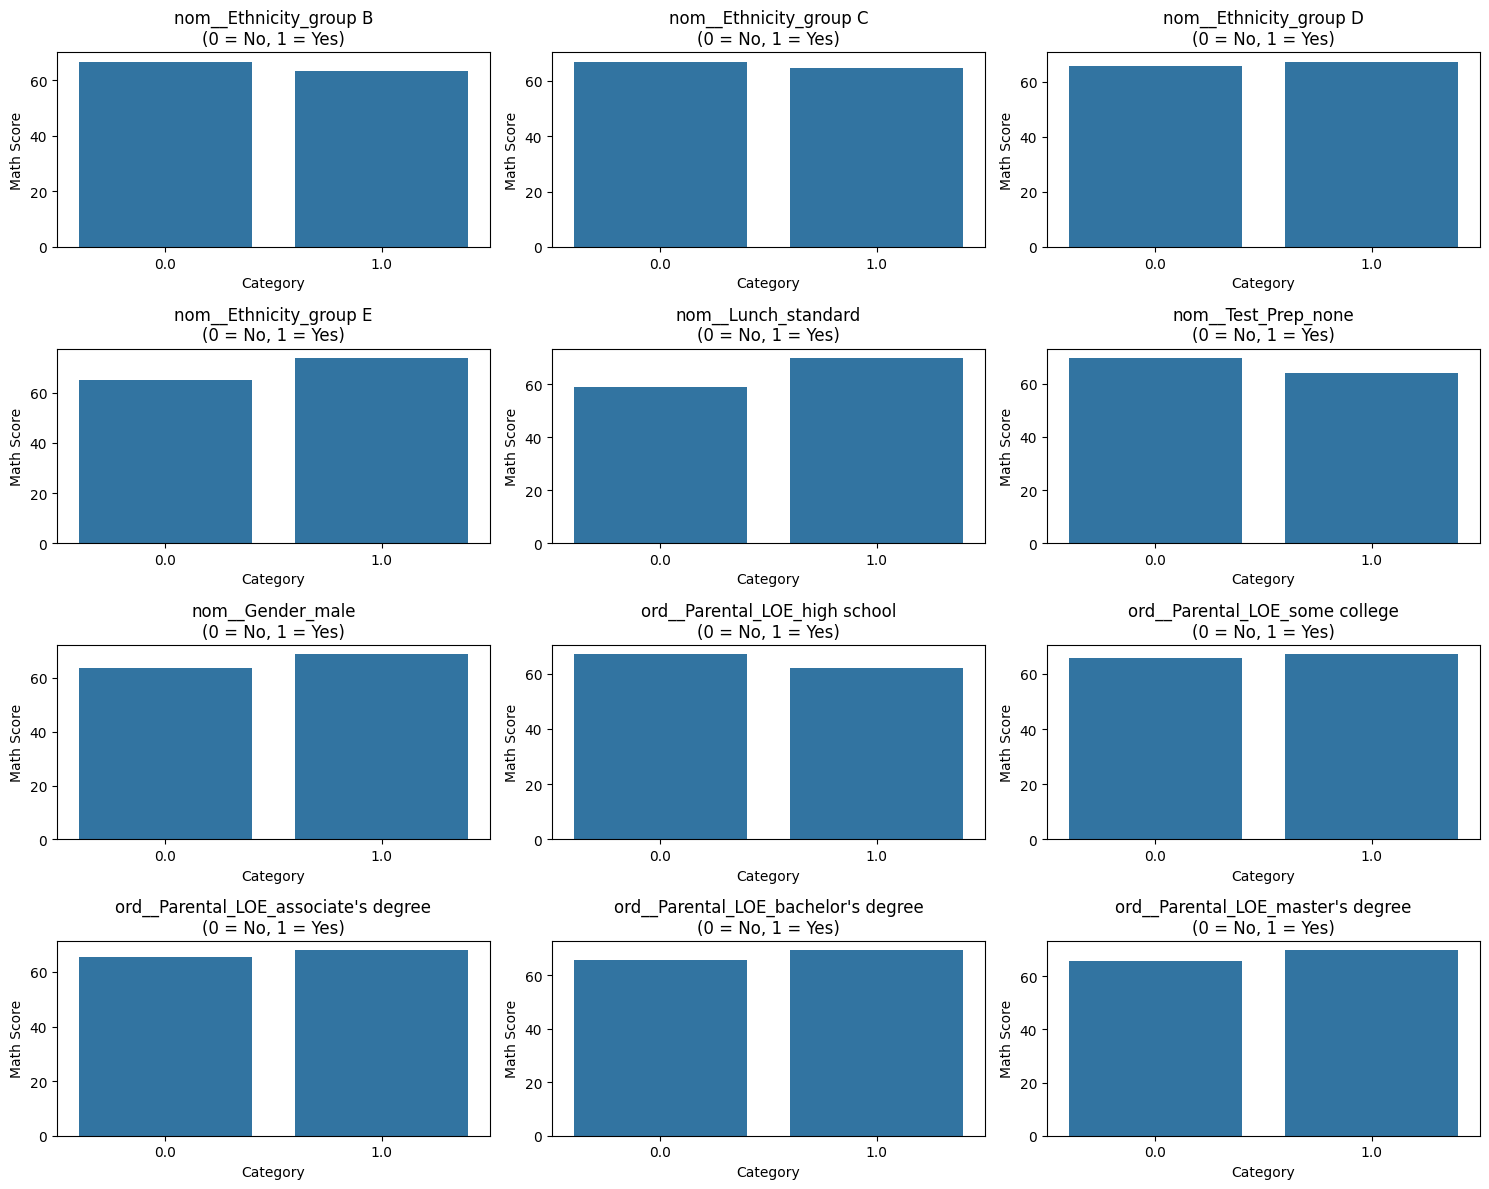

In [144]:
categorical_vars = [
    "nom__Ethnicity_group B",
    "nom__Ethnicity_group C",
    "nom__Ethnicity_group D",
    "nom__Ethnicity_group E",
    "nom__Lunch_standard",
    "nom__Test_Prep_none",
    "nom__Gender_male",
    "ord__Parental_LOE_high school",
    "ord__Parental_LOE_some college",
    "ord__Parental_LOE_associate's degree",
    "ord__Parental_LOE_bachelor's degree",
    "ord__Parental_LOE_master's degree"
]

plt.figure(figsize=(15,12))

for i, var in enumerate(categorical_vars):
    plt.subplot(4, 3, i+1)
    sns.barplot(
        x=Cleaned_data[var],
        y=Cleaned_data["num__Math_Score"],
        errorbar=None
    )
    plt.title(f"{var}\n(0 = No, 1 = Yes)")
    plt.xlabel("Category")
    plt.ylabel("Math Score")

plt.tight_layout()

#### **Correlation Heatmap**

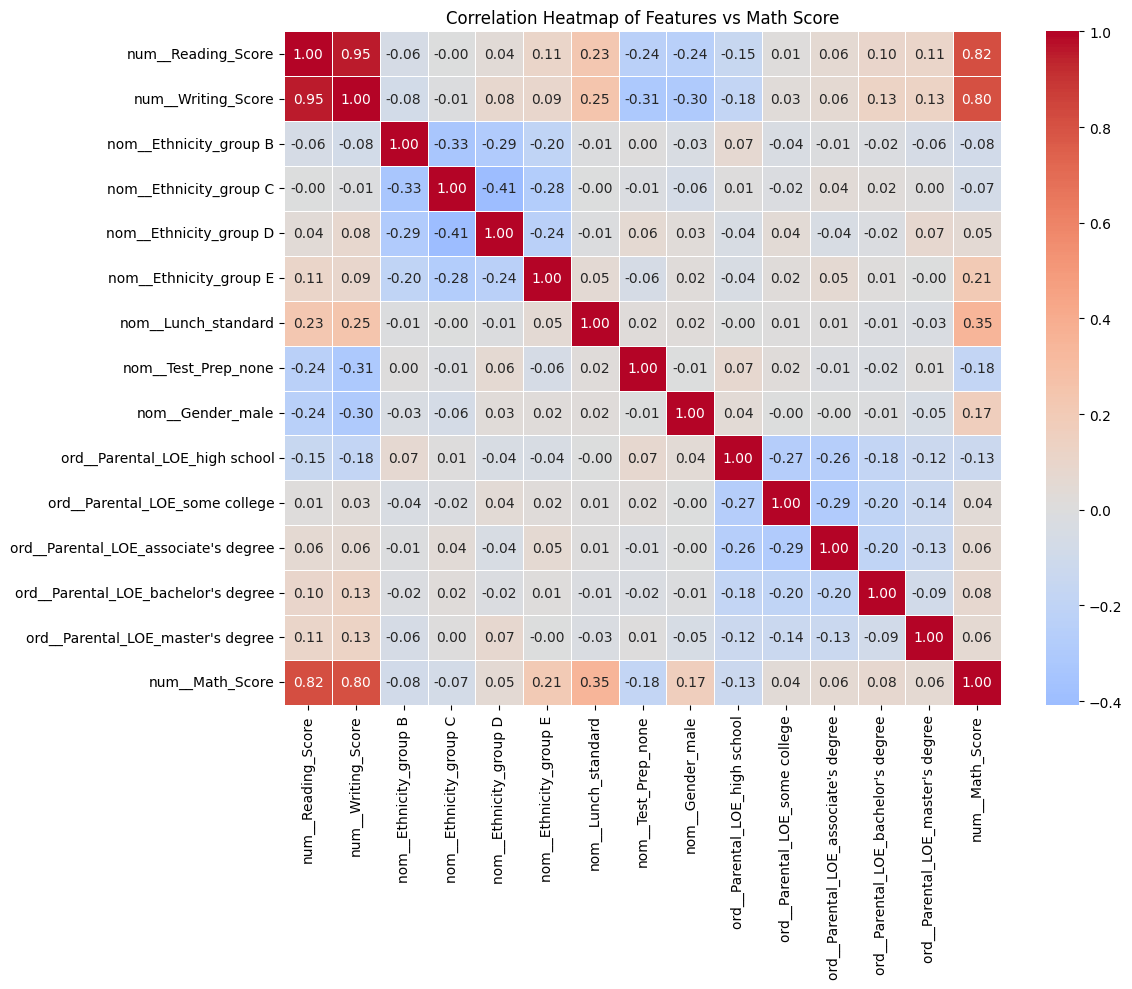

In [145]:
target_var = "num__Math_Score"


ml_data = Cleaned_data[independent_vars + [target_var]]


corr_matrix = ml_data.corr()


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix, 
    annot=True,        
    cmap='coolwarm',   
    center=0,          
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Features vs Math Score")
plt.tight_layout()
plt.show()


#### **Corr Plot**

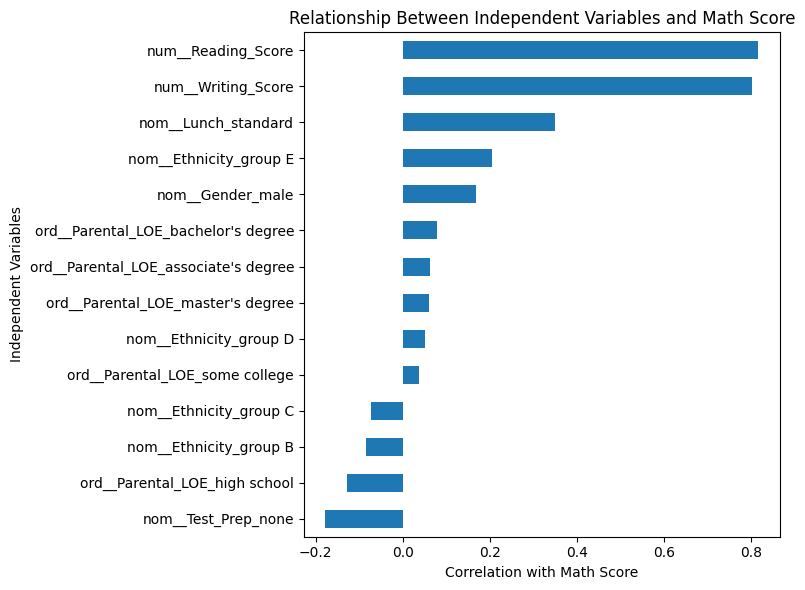

In [146]:
ml_data = Cleaned_data[independent_vars + ["num__Math_Score"]]

corr = ml_data.corr()["num__Math_Score"].drop("num__Math_Score")
corr = corr.sort_values()

plt.figure(figsize=(8, 6))
corr.plot(kind="barh")
plt.title("Relationship Between Independent Variables and Math Score")
plt.xlabel("Correlation with Math Score")
plt.ylabel("Independent Variables")
plt.tight_layout()
plt.show()

## **Key Insights**
**1. The Predictive Model is Highly Accurate**

The Linear Regression model for predicting Math Score achieved an R-Squared Value of 0.86 and had an adjusted R-Squared of 0.85. This shows that the independent variables, which are the scores and socioeconomic factors explain the variability in the Math score, demonstrating the model's predictive power.

**2. Academic Interdependence is the Dominant Factor**

The high R-Squared is primarily driven by the exceptionally strong linear correlation between Math Score and the other continuous variables, Reading Score and Writing Score. This suggests that a student's general academic ability and performance across all core subjects is the most powerful determinant of their Math Score.

**3. Socioeconomic Factors Provide Measurable Incremental Gain**

Although less correlated than the other scores, the analysis confirmed that key socioeconomic binary factors, such as receiving Standard Lunch and completing the Test Preparation Course, are significantly associated with a positive shift in the Math Score distribution. These variables are important, measurable contributors to the model's predictive accuracy, indicating external support and preparation have a tangible impact on performance.